In [123]:
# Created by ravissement on 2021-11-17
#
#
# 공공데이터 포탈(2021-10-22)
# 데이터 상세 - 국민연금공단_국민연금 가입 사업장 내역
# 국민연금 데이터를 활용하여 특정 회사의 임직원 평균 연봉 역추정
# ex) kreditjob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['figure.figsize'] = (10, 7)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

%matplotlib inline

In [124]:
df = pd.read_csv('D:/ravissement/Python/pythonData/csv/10_22_2021.csv',  encoding='cp949')

In [125]:
df.head()

,자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영),사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수(고지인원 수 포함),당월고지금액( 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준) 상한액 2021.7.~2022.6. 5240000원(2021.7.1.기준) ),신규취득자수(납부재개 포함 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영)),상실가입자수(납부예외 포함 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)
0,2021-09,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,4,973420,0,0
1,2021-09,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,19,4094620,1,8
2,2021-09,노들새마을금고,108820,1,06923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,1988-01-01,NaN,NaN,13,4736460,0,0
3,2021-09,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,24,4933280,0,0
4,2021-09,희성전자(주),106810,1,04410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,421,189809500,0,3


In [126]:
df.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1 등록 2 탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1 법인 2 개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액( 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음  상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준) 상한액 2021.7.~2022.6.  5240000원(2021.7.1.기준) )',
       ' 신규취득자수(납부재개 포함  전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함  전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

In [127]:
# columns 단순화(Clean)
columns = ['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드', 
           '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', 
           '적용일', '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실',]

In [128]:
len(df.columns)

22

In [129]:
len(columns)

22

In [130]:
df.columns = columns

In [131]:
df.head()

,자료생성년월,사업장명,사업자번호,가입상태,우편번호,지번주소,도로명주소,법정주소코드,행정주소코드,광역시코드,...,사업장형태,업종코드,업종코드명,적용일,재등록일,탈퇴일,가입자수,고지금액,신규,상실
0,2021-09,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,4,973420,0,0
1,2021-09,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,19,4094620,1,8
2,2021-09,노들새마을금고,108820,1,06923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,1988-01-01,NaN,NaN,13,4736460,0,0
3,2021-09,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,24,4933280,0,0
4,2021-09,희성전자(주),106810,1,04410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,421,189809500,0,3


In [132]:
# Main Column
#df_main = df[['사업장명', '가입자수', '신규', '상실', '고지금액']]
df_main = df[['사업장명', '가입자수', '광역시코드', '시군구코드', '도로명주소', '업종코드', '업종코드명', '신규', '상실', '고지금액']]

In [133]:
df_main.head()

,사업장명,가입자수,광역시코드,시군구코드,도로명주소,업종코드,업종코드명,신규,상실,고지금액
0,우성기전(주),4,41,610,경기도 광주시 도척면 도척윗로,292201,동력식 수지 공구 제조업,0,0,973420
1,서능공원묘지운영회(재),19,41,650,,701700,화장터 운영 묘지 분양 및 관리업,1,8,4094620
2,노들새마을금고,13,11,590,서울특별시 동작구 만양로,659202,신용조합,0,0,4736460
3,유창성업(주),24,28,260,인천광역시 서구 갑문2로,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,0,0,4933280
4,희성전자(주),421,11,170,서울특별시 용산구 독서당로14길,701201,비주거용 건물 임대업(점포 자기땅),0,3,189809500


In [122]:
#df.loc[df['광역시코드'] == 29][['사업장명','지번주소','신규', '시군구코드']].sort_values(by='신규', ascending=False).head(20)
#df.loc[ (df['업종코드'] == 722000) & (df['광역시코드'] == 29) ][['사업장명','지번주소','신규', '시군구코드', '업종코드명']].sort_values(by='신규', ascending=False).head(30)

In [87]:
df_main['신규'].mean()

0.9217344015428863

In [88]:
df_main['상실'].mean()

0.6396138299124838

In [89]:
df_main['가입자수'].mean()

19.427601518218054

In [134]:
df_main['고지금액'].mean()

5761341.8324764855

In [135]:
(df_main['고지금액'] / df_main['가입자수']).head()

0   243355.00
1   215506.32
2   364343.08
3   205553.33
4   450853.92
dtype: float64

In [136]:
df_main['인당고지금액'] = df_main['고지금액'] / df_main['가입자수']
df['인당고지금액'] = df['고지금액'] / df['가입자수']

In [137]:
df_main['인당고지금액'].head()

0   243355.00
1   215506.32
2   364343.08
3   205553.33
4   450853.92
Name: 인당고지금액, dtype: float64

In [163]:
# 국민연금 보험율 9% : 근로자 4.5%, 사업주 4.5%
# 임직원 평균 월급 : 인당고지금액/9 * 100
# 임직원 평균 연봉 : 임직원 평균 월급 * 12

df_main['평균월급'] = df_main['인당고지금액'] / 9 * 100

df['평균월급'] = df['인당고지금액'] / 9 * 100
#df['평균월급'] = int(df['인당고지금액'] / 9 * 100, ',')
#print(type(df['평균월급']))

<class 'pandas.core.series.Series'>


In [139]:
df_main['평균연봉'] = df_main['평균월급'] * 12
df['평균연봉'] = df['평균월급'] * 12

In [140]:
df_main['평균월급'].notnull().sum()

512167

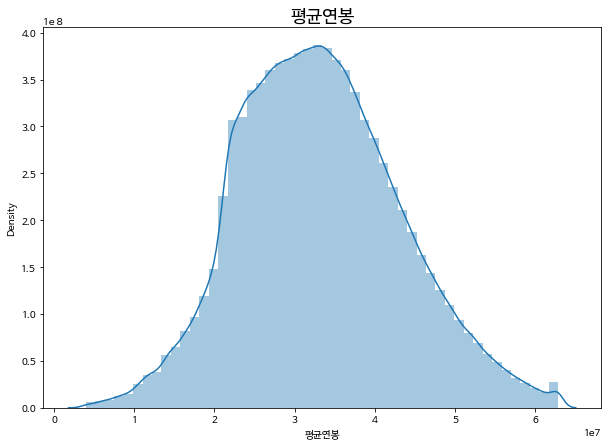

In [141]:
plt.figure(figsize=(10, 7))
sns.distplot(df_main.loc[df_main['평균연봉'].notnull(), '평균연봉'])
plt.title('평균연봉', fontsize=18)
plt.show()

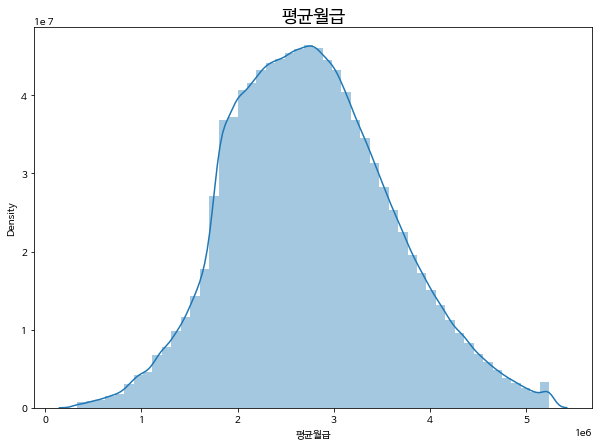

In [142]:
plt.figure(figsize=(10, 7))
sns.distplot(df_main.loc[df_main['평균월급'].notnull(), '평균월급'])
plt.title('평균월급', fontsize=18)
plt.show()

In [160]:
#df_main.sort_values(by='가입자수', ascending=False).head(20)
df_main.loc[ (df['업종코드'] == 722000) & (df['광역시코드'] == 29) ][['사업장명','도로명주소', '가입자수','신규', '시군구코드', '업종코드명', '평균월급', '평균연봉']].sort_values(by='평균월급', ascending=False).head(30)
#df_sub.loc[ (df['업종코드'] == 722000) & (df['광역시코드'] == 29) ][['사업장명','지번주소','신규', '시군구코드', '업종코드명']].sort_values(by='신규', ascending=False).head(50)
#df_main.info

,사업장명,도로명주소,가입자수,신규,시군구코드,업종코드명,평균월급,평균연봉
315181,마일로스주식회사,광주광역시 동구 금남로,16,0,110,응용 소프트웨어 개발 및 공급업,5032875.00,60394500.00
519378,런시스주식회사(RunSYSINC.),광주광역시 광산구 진곡산단3번로,4,0,200,응용 소프트웨어 개발 및 공급업,4607500.00,55290000.00
484315,（주）영신디엔씨-(상용)신용동 현대지역주택조합 토공사,광주광역시 북구 복룡길30번길,3,0,170,응용 소프트웨어 개발 및 공급업,4480000.00,53760000.00
286368,주식회사 에스아이오토,광주광역시 북구 첨단벤처로40번길,9,0,170,응용 소프트웨어 개발 및 공급업,3986074.07,47832888.89
296078,（주）에이블정보기술광주지점,광주광역시 서구 상무중앙로,5,0,140,응용 소프트웨어 개발 및 공급업,3866177.78,46394133.33
468106,위디비 주식회사,광주광역시 북구 용봉로,6,1,170,응용 소프트웨어 개발 및 공급업,3861962.96,46343555.56
476494,에스에스소프트,광주광역시 동구 충장로,3,0,110,응용 소프트웨어 개발 및 공급업,3746666.67,44960000.00
345695,(주)플랫폼기술연구소,광주광역시 서구 회재로,4,0,140,응용 소프트웨어 개발 및 공급업,3715500.00,44586000.00
471859,주식회사 지아이랩,광주광역시 북구 첨단과기로,3,1,170,응용 소프트웨어 개발 및 공급업,3696666.67,44360000.00
270144,주식회사미래비전,광주광역시 북구 첨단과기로,17,0,170,응용 소프트웨어 개발 및 공급업,3629973.86,43559686.27


In [41]:
df_main.sort_values(by='신규', ascending=False).head(20)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
383787,쿠팡풀필먼트서비스 유한회사,14839,5520,14495,2309405040,155630.77,1729230.81,20750769.73
527364,현대아이티씨주식회사,2663,2638,9,1055736780,396446.41,4404960.07,52859520.84
241228,쿠팡 주식회사,23593,2300,1268,6699193920,283948.37,3154981.90,37859782.82
320790,쿠팡풀필먼트서비스 유한회사,20947,1934,1117,4946495940,236143.41,2623815.63,31485787.56
4363,삼성전자(주),110671,1357,412,51088016840,461620.63,5129118.12,61549417.45
45202,한국맥도날드유한회사(A),8833,1164,1512,887082360,100428.21,1115868.98,13390427.71
58846,효성ITX (주),8364,1092,792,1661933460,198700.80,2207786.63,26493439.50
532768,주식회사 베스트피엠피,1081,1081,12,357380100,330601.39,3673348.75,44080185.01
3427,엘지이노텍(주),11622,1014,391,4324462840,372092.83,4134364.75,49612376.99
528868,현대아이엠씨주식회사,982,976,2,400983680,408333.69,4537040.96,54444491.51


In [42]:
df_main.sort_values(by='상실', ascending=False).head(20)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
383787,쿠팡풀필먼트서비스 유한회사,14839,5520,14495,2309405040,155630.77,1729230.81,20750769.73
377099,중앙경찰학교(신임),1998,121,1877,238601160,119420.00,1326888.89,15922666.67
13605,(주)에스앤아이코퍼레이션,2147,45,1752,856165700,398773.03,4430811.47,53169737.62
45202,한국맥도날드유한회사(A),8833,1164,1512,887082360,100428.21,1115868.98,13390427.71
89291,SK이노베이션,2852,47,1504,1246310560,436995.29,4855503.19,58266038.34
241228,쿠팡 주식회사,23593,2300,1268,6699193920,283948.37,3154981.90,37859782.82
320790,쿠팡풀필먼트서비스 유한회사,20947,1934,1117,4946495940,236143.41,2623815.63,31485787.56
296413,피엔씨텍(주),950,51,948,298595980,314311.56,3492350.64,41908207.72
224078,주식회사비케이알(버거킹),4737,822,893,471766060,99591.74,1106574.86,13278898.32
3874,(주)교원,816,21,816,251668360,308417.11,3426856.75,41122281.05


In [43]:
# 100인 이하 기업
people_limit = 100
small = df_main.loc[(df_main['가입자수'].notnull()) & (df_main['가입자수'] < people_limit)]
small['가입자수'].isnull().sum()

0

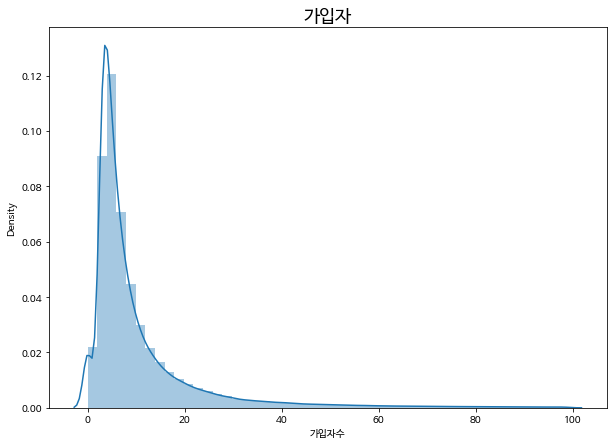

In [44]:
plt.figure(figsize=(10, 7))
sns.distplot(small['가입자수'])
plt.title('가입자', fontsize=18)
plt.show()

In [45]:
small.sort_values(by='상실', ascending=False)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
515057,주식회사이솔건업-(일용)충북 진천음성 혁신도시 C3블럭 중 철근콘크리트공사(1공구),99,99,99,37874300,382568.69,4250763.19,51009158.25
516168,시흥시청/2021년 희망일자리3,99,0,98,8383320,84680.00,940888.89,11290666.67
478236,주식회사한스테크,97,0,96,36277900,373998.97,4155544.10,49866529.21
500355,충주시청(경제기업과)-희망근로지원사업,94,20,92,11392480,121196.60,1346628.84,16159546.10
515503,대전시청-2021 희망근로 지원사업(시내버스 방역),91,8,91,11564280,127080.00,1412000.00,16944000.00
...,...,...,...,...,...,...,...,...
206113,주식회사스튜디오마음,8,0,0,1771080,221385.00,2459833.33,29518000.00
206112,（주）동양,4,0,0,850760,212690.00,2363222.22,28358666.67
206111,(주)지에스앤티,12,0,0,3785640,315470.00,3505222.22,42062666.67
206110,주식회사씨맥,8,0,0,3584880,448110.00,4979000.00,59748000.00


In [46]:
small.sort_values(by='신규', ascending=False)

,사업장명,가입자수,신규,상실,고지금액,인당고지금액,평균월급,평균연봉
515057,주식회사이솔건업-(일용)충북 진천음성 혁신도시 C3블럭 중 철근콘크리트공사(1공구),99,99,99,37874300,382568.69,4250763.19,51009158.25
531795,천안시청(복지정책과 코로나 상생 국민지원금),95,95,62,19491480,205173.47,2279705.26,27356463.16
534945,주식회사메디엔젤 노원지사,95,95,1,16037380,168814.53,1875716.96,22508603.51
526336,(주)한국이엔씨-(일용) [마감] SYSTEM CEILING 공사,92,92,4,19765040,214837.39,2387082.13,28644985.51
534460,세종특별자치시청-2차 희망근로지원사업,90,90,3,8910000,99000.00,1100000.00,13200000.00
...,...,...,...,...,...,...,...,...
237565,주식회사 케이이디,4,0,0,935160,233790.00,2597666.67,31172000.00
237563,（주）온유소프트,5,0,0,1084760,216952.00,2410577.78,28926933.33
237562,태성건설주식회사,4,0,0,449880,112470.00,1249666.67,14996000.00
237561,(주)대경엔지니어링,9,0,0,3550120,394457.78,4382864.20,52594370.37


In [47]:
df.columns

Index(['자료생성년월', '사업장명', '사업자번호', '가입상태', '우편번호', '지번주소', '도로명주소', '법정주소코드',
       '행정주소코드', '광역시코드', '시군구코드', '읍면동코드', '사업장형태', '업종코드', '업종코드명', '적용일',
       '재등록일', '탈퇴일', '가입자수', '고지금액', '신규', '상실', '인당고지금액', '평균월급', '평균연봉'],
      dtype='object')

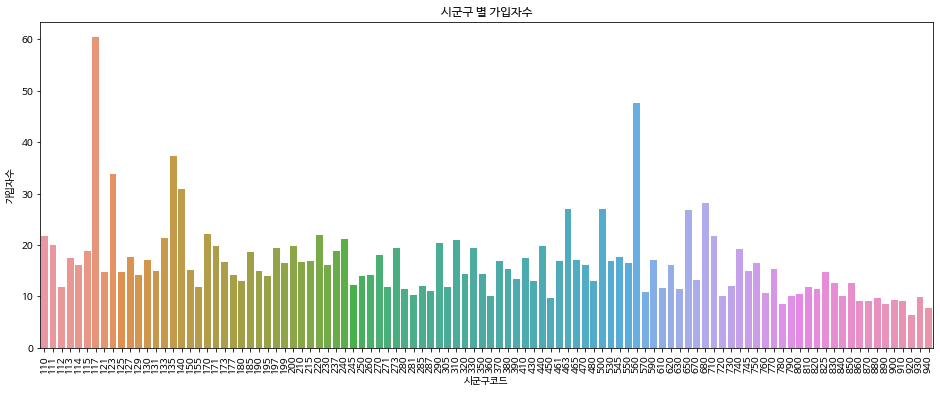

In [48]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.groupby('시군구코드')['가입자수'].mean().index, y=df.groupby('시군구코드')['가입자수'].mean())
plt.title('시군구 별 가입자수')
plt.xticks(rotation=90)
plt.show()

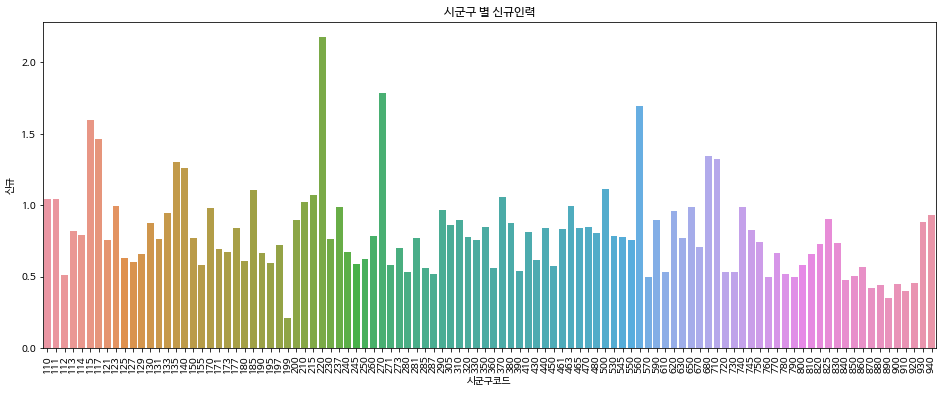

In [49]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.groupby('시군구코드')['신규'].mean().index, y=df.groupby('시군구코드')['신규'].mean())
plt.title('시군구 별 신규인력')
plt.xticks(rotation=90)
plt.show()

In [55]:
# 신규 인력 유입이 많음
df.loc[df['시군구코드'] == 220][['사업장명','지번주소','신규', '시군구코드']].sort_values(by='신규', ascending=False).head(20)

,사업장명,지번주소,신규,시군구코드
529333,오뚜기라면주식회사,경기도 평택시 안중읍,618,220
529745,주식회사유창이앤씨-(일용)평택 FAB3기 신축공사 수장공사1공구,경기도 평택시 고덕면,583,220
534331,주식회사만도모빌리티솔루션즈,경기도 평택시 포승읍,390,220
529840,두원이에프씨（주）-(일용)평택 FAB3기 신축공사 중 일반전기 1공구,경기도 평택시 고덕면,264,220
532856,(주)정호이앤씨/일용/평택 FAB3기 신축공사 일반배관 2공구,경기도 평택시 고덕면,243,220
532049,(주）세방테크-(일용)평택 FAB 3기 신축공사 일반배관 1-2공구,경기도 평택시 고덕면,228,220
530144,(주）삼진일렉스-(일용) 삼성 평택FAB 3기 신축공사 중 일반전기 2공구,경기도 평택시 고덕면,226,220
533596,（주）태우이엔지-(일용)평택 FAB3기 신축공사 수장공사3공구,경기도 평택시 고덕면,206,220
510838,한양이엔지（주）-(일용)평택 EUV 하층마감 공사 중 FAB모듈 공사,경기도 평택시 고덕면,180,220
508244,（주）우현이앤지-(일용)P3 Ph1 소방설비공사(복합동),경기도 평택시 고덕면,172,220


In [51]:
# 상실 인력이 많음
df.loc[df['시군구코드'] == 560][['사업장명','지번주소','상실']].sort_values(by='상실', ascending=False).head(20)

,사업장명,지번주소,상실
58846,효성ITX (주),서울특별시 영등포구 양평동4가,792
11725,(주)트랜스코스모스코리아,서울특별시 영등포구 여의도동,624
14086,엘지전자(주),서울특별시 영등포구 여의도동,343
75687,(주)윌앤비전,서울특별시 영등포구 당산동4가,275
179040,주식회사 발렉스서비스,서울특별시 영등포구 여의도동,190
48448,(주)에프에이모스트,서울특별시 영등포구 양평동3가,188
12291,(주)케이티아이에스,서울특별시 영등포구 여의도동,187
3212,국민은행(주),서울특별시 영등포구 여의도동,141
48534,(주)조은시스템,서울특별시 영등포구 문래동3가,132
164383,엘지디스플레이(주),서울특별시 영등포구 여의도동,128


In [52]:
# 업종별 신규 인력 현황
df.groupby('업종코드명')['신규'].mean()

업종코드명
1차 금속제품 도매업                 0.21
1차 유리제품 유리섬유 및 광학용 유리 제조업   3.00
BIZ_NO미존재사업장                0.73
가공 및 정제염 제조업                0.30
가구 내 고용활동                   1.50
                            ... 
화훼류 및 식물 도매업                0.33
화훼작물 재배업                    0.12
환경 관련 엔지니어링 서비스업            0.67
환경설비 건설업                    0.61
휴양 콘도 운영업                   7.52
Name: 신규, Length: 1190, dtype: float64

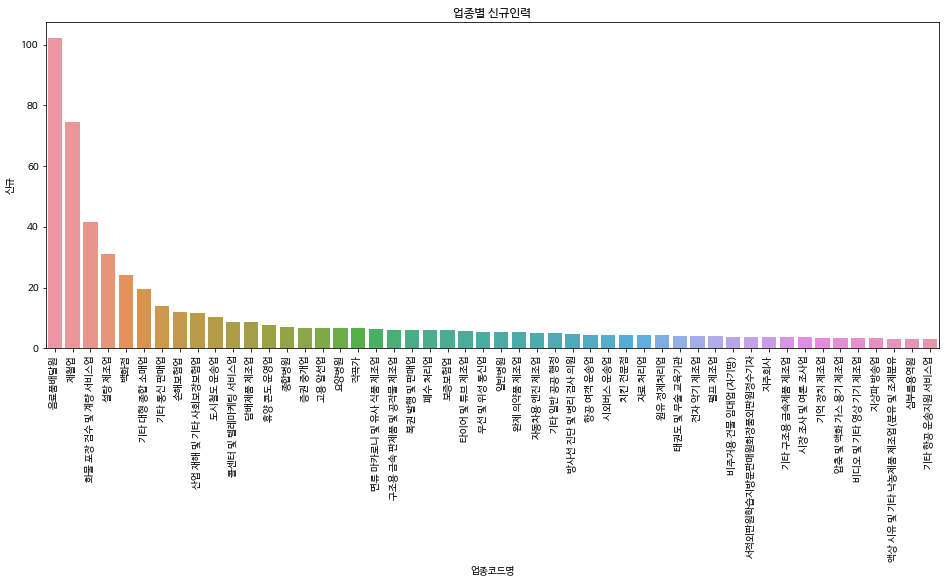

In [54]:
df_1 = df.groupby('업종코드명')['신규'].mean()

df_top100 = df_1.sort_values(ascending=False).head(50)
plt.figure(figsize=(16, 6))
sns.barplot(x=df_top100.index, y=df_top100)
plt.title('업종별 신규인력')
plt.xticks(rotation=90)
plt.show()